Code to create visualizations from data obtained from sensors.

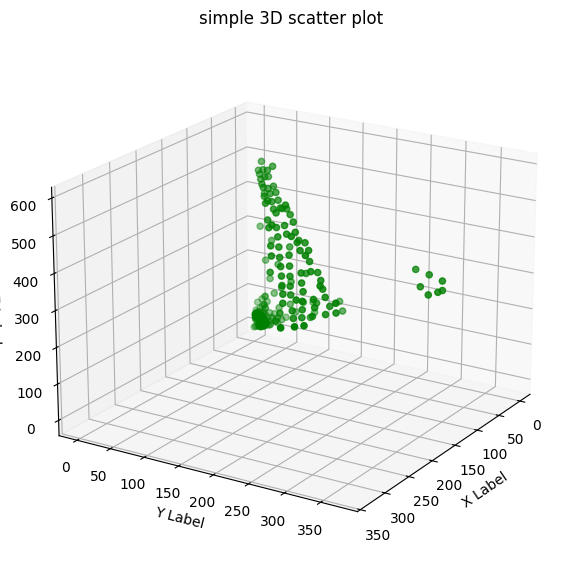

Widget(value='<iframe src="http://localhost:53873/index.html?ui=P_0x1eb79afd9d0_5&reconnect=auto" class="pyvis…

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pyvista as pv
import csv

dataSource = 'Scan_1.csv'

with open(dataSource, 'r') as file:
    reader = csv.reader(file)
    next(reader)
    data = list(reader)

data_array = np.array(data, dtype=float)

distance = data_array[:,0]
theta1 = data_array[:,2] # Tilt angle (Servo2)
theta2 = data_array[:,1] # Pan angle (Servo1)

# Mathematical conversions

# Convert angles from degrees to radians
theta1 = theta1 * (np.pi/180)
theta2 = theta2 * (np.pi/180)

# Convert the coordinates from polar to cartesian
Z_coordinates = np.multiply(distance, np.sin(theta1))
Y_coordinates = np.multiply(np.multiply(distance, np.cos(theta1)), np.sin(theta2))
X_coordinates = np.multiply(np.multiply(distance, np.cos(theta1)), np.cos(theta2))


# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
#ax.set_xlim(-10,10)
#ax.set_ylim(0,20)
#ax.set_zlim(-10,10)
ax.view_init(elev=20., azim=32)
 

# Creating plot
ax.scatter3D(X_coordinates, Y_coordinates, Z_coordinates, color = "green")
plt.title("simple 3D scatter plot")
 

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
# show plot
plt.show()


# Create good 3d plot
pv.Plotter(window_size=[20, 20])
all_coordinates = [X_coordinates, Y_coordinates, Z_coordinates]
data_points = np.transpose(all_coordinates)


# points is a 3D numpy array (n_points, 3) coordinates of a sphere
cloud = pv.PolyData(data_points)

surf = cloud.delaunay_2d()
surf.plot(show_edges=True, interactive=True)

